# Plotting and comparison of big sensor variants
- Plots for S12 and S11 parameters linear magnitude and phase
- With the exception of a single free space variant, all measured with
  1m extension coax cables that induce further reflections and uncertainties.
- We try to repeat the most promissing distance variant with better separation of the cables.
- At least some reflections are due to cable proximity or crossing.  


In [1]:
#variant_folder="big-29"
#variant_folder="big-20"
#variant_folder="big-15"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
import re


default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def mag_phase(real, imaginary):
    magnitude = np.sqrt(real**2 + imaginary**2)
    phase = np.arctan2(imaginary, real) 
    cont_phase = np.unwrap(phase)
    # unwrap - add +/- 2pik where difference is  out of -/+ pi.
    deg = np.degrees(cont_phase)
    return magnitude, deg

def ax_setup(ax):
    ax.set_xticks(np.linspace(50, 300, 11))
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5) 
    ax.set_xlim((50, 300))
    ax.tick_params(axis='x', direction='in', pad=-15)
    ax.tick_params(axis='y', direction='in', pad=-25)

    y_min, y_max = ax.get_ylim()

    # Calculate ideal number of ticks and find nice round numbers for limits
    # This is typically handled internally, but we'll do it manually for control
    from matplotlib.ticker import MaxNLocator
    
    # You can adjust 'nbins' to change the number of ticks
    nbins = 10  # Example: 5 ticks
    ax.yaxis.set_major_locator(MaxNLocator(nbins=nbins, integer=False))

file_col_map = {
    'big-direct-free': 'orange',
    'wet-free': 'orange',
    'wet-free-after-water': 'yellow',
    'wet-free-after-all': 'red',
    'ext-free': 'red',
    'big-ext-kacirek-free': 'green',
    'big-ext-free': 'red',
    'ext-kacirek-free': 'green',
    'ext-kacirek-water': 'blue',
    'wet-sand-00': 'green',
    'wet-sand-10': 'cyan',
    'wet-sand-100': 'violet',
    'wet-water': 'blue'
}

def plot_file(axes, directory, filename):
    # Construct the full file path
    file_path = os.path.join(directory, filename)
    file_stem = None
    for key, i_col in file_col_map.items():
        if filename.startswith(key):
            file_stem = key 
            color = i_col
    if file_stem is None:
        print("No color for: ", filename)
    
    # Read the CSV file, ignoring comment lines
    df = pd.read_csv(file_path, sep=';', comment='#')
    
    freq = np.array(df['freq[Hz]']) / 1e6

    for i_re, i_im in [(1, 2), (3, 4)]:
        i_ax = None
        for i_s, s in enumerate(['S12', 'S11']):
            if df.columns[i_re].find(s) > -1:
                i_ax = i_s
        mag, phase = mag_phase(df.iloc[:, i_re], df.iloc[:, i_im])
        ax = axes[0, i_ax]
        ax.plot(freq, mag, label=file_stem, color=color)
        #ax.set_xlabel('Frequency [Hz]')
        if i_ax == 0:
            ax.set_ylabel('Magnitude')
        
        ax = axes[1, i_ax]
        ax.plot(freq, phase, label=file_stem, color=color)
        ax.set_xlabel('Frequency [MHz]')
        if i_ax == 0:
            ax.set_ylabel('Phase [deg]')

def plot_dir(directory):
    
    # Create a figure with 4 subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    
    #Process each CSV file in the directory
    for filename in os.listdir(directory):
        print(directory, '|', filename)
        if filename.endswith('.csv'):
            plot_file(axes, directory, filename)
    #plot_file(axes, "big-ext-free-Ch1.csv")
    
    handles, labels = [], []
    for ax in axes.flatten():
        ax_setup(ax)
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Check for duplicates
                handles.append(handle);
                labels.append(label)
    
    
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1))
    fig.suptitle(directory)
    fig.savefig(directory+'.pdf')
    plt.tight_layout()
    plt.show()



2024_08_07/big-29 | ext-kacirek-water-03-Ch1.csv
2024_08_07/big-29 | big-ext-free-Ch2.csv
2024_08_07/big-29 | big-ext-free-Ch1.csv
2024_08_07/big-29 | big-ext-kacirek-free-02-Ch2.csv
2024_08_07/big-29 | ext-kacirek-water-02.PNG
2024_08_07/big-29 | big-ext-kacirek-free-02.PNG
2024_08_07/big-29 | ext-kacirek-water-03-Ch2.csv
2024_08_07/big-29 | ext-kacirek-water-03.PNG
2024_08_07/big-29 | big-ext-free.PNG
2024_08_07/big-29 | big-ext-kacirek-free-01-Ch1.csv
2024_08_07/big-29 | ext-kacirek-water-02-Ch1.csv
2024_08_07/big-29 | ext-kacirek-water-01.PNG
2024_08_07/big-29 | big-ext-kacirek-free-01.PNG
2024_08_07/big-29 | big-direct-free-Ch2.csv
2024_08_07/big-29 | ext-kacirek-water-02-Ch2.csv
2024_08_07/big-29 | ext-kacirek-water-01-Ch2.csv
2024_08_07/big-29 | big-direct-free-Ch1.csv
2024_08_07/big-29 | big-ext-kacirek-free-03-Ch2.csv
2024_08_07/big-29 | big-ext-kacirek-free-03.PNG
2024_08_07/big-29 | big-ext-kacirek-free-02-Ch1.csv
2024_08_07/big-29 | big-ext-kacirek-free-01-Ch2.csv
2024_08_0

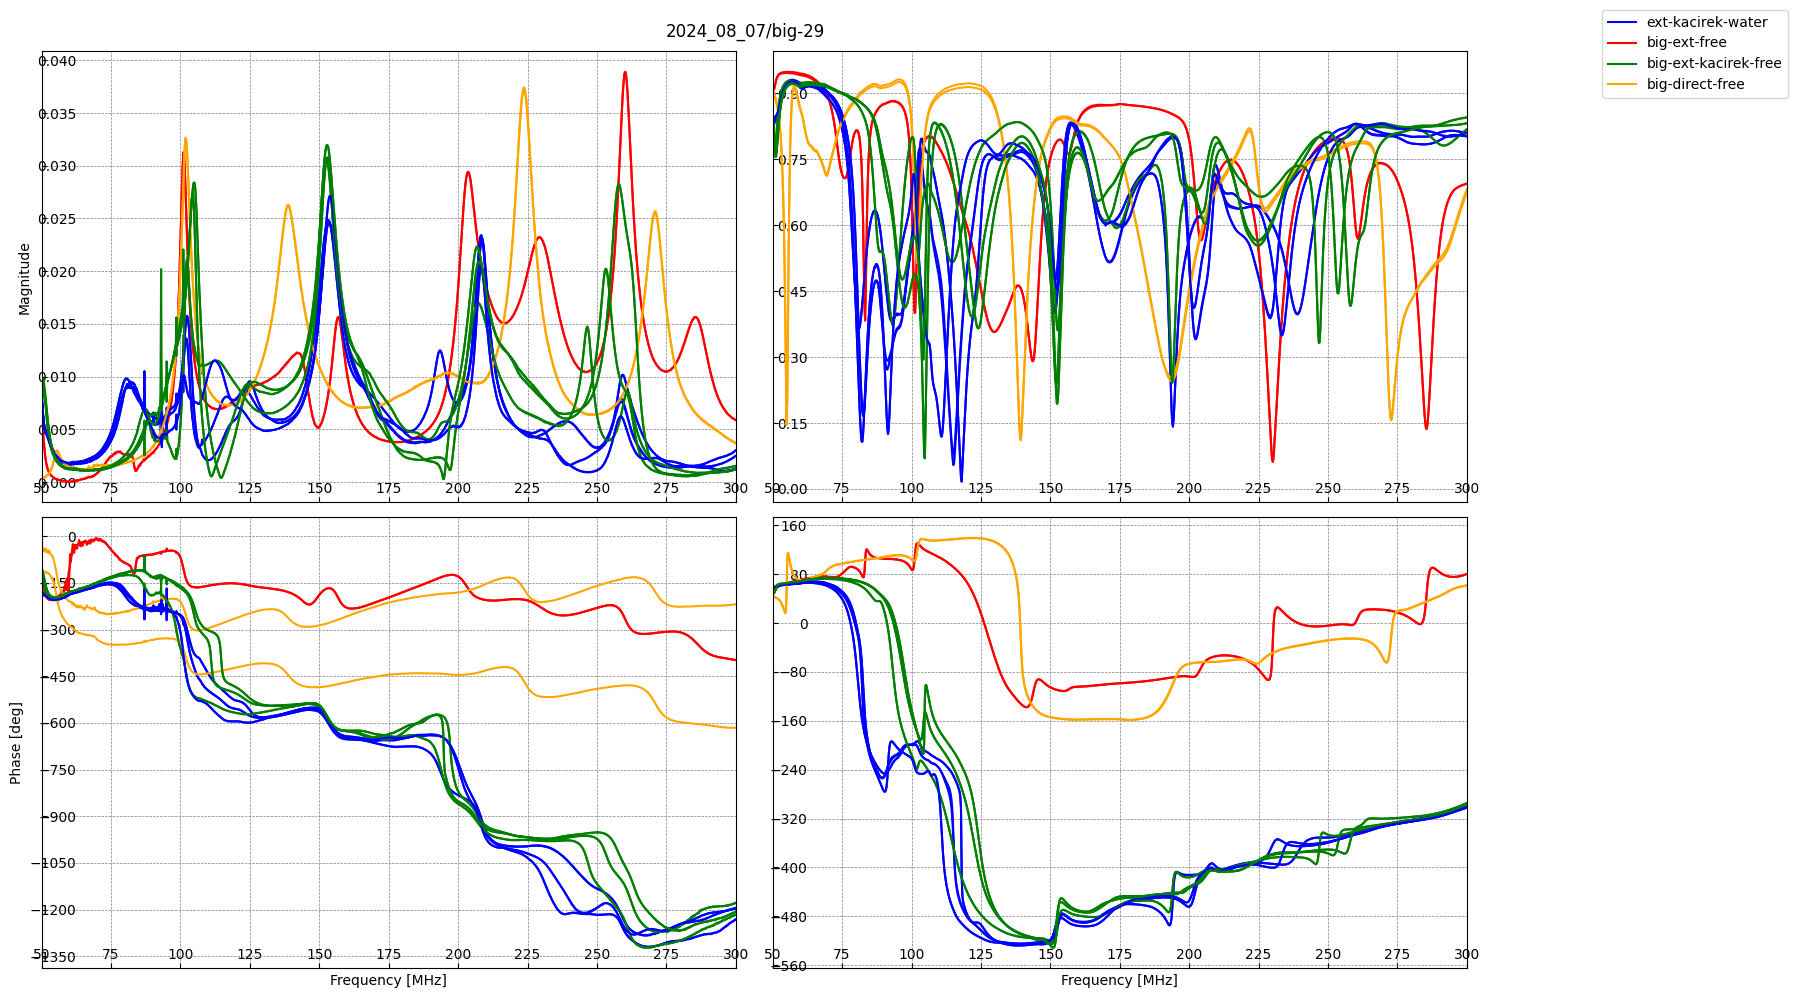

In [3]:
plot_dir('2024_08_07/big-29')

2024_08_07/big-wet-29 | wet-sand-10-03-Ch1.csv
2024_08_07/big-wet-29 | wet-free-after-all-01-Ch2.csv
2024_08_07/big-wet-29 | wet-sand-00-03.PNG
2024_08_07/big-wet-29 | wet-sand-100-03-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-10-01.PNG
2024_08_07/big-wet-29 | wet-sand-00-02.PNG
2024_08_07/big-wet-29 | wet-sand-10-01-Ch2.csv
2024_08_07/big-wet-29 | wet-free-after-all-01-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-10-02-Ch1.csv
2024_08_07/big-wet-29 | wet-water-01.PNG
2024_08_07/big-wet-29 | wet-sand-10-01-Ch1.csv
2024_08_07/big-wet-29 | wet-free-03.PNG
2024_08_07/big-wet-29 | wet-free-after-all-02.PNG
2024_08_07/big-wet-29 | wet-free-03-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-00-03-Ch2.csv
2024_08_07/big-wet-29 | wet-water-02-Ch2.csv
2024_08_07/big-wet-29 | wet-water-01-Ch2.csv
2024_08_07/big-wet-29 | wet-free-01.PNG
2024_08_07/big-wet-29 | wet-sand-100-02.PNG
2024_08_07/big-wet-29 | wet-sand-00-02-Ch1.csv
2024_08_07/big-wet-29 | wet-free-after-all-03.PNG
2024_08_07/big-wet-29 | wet-sand-0

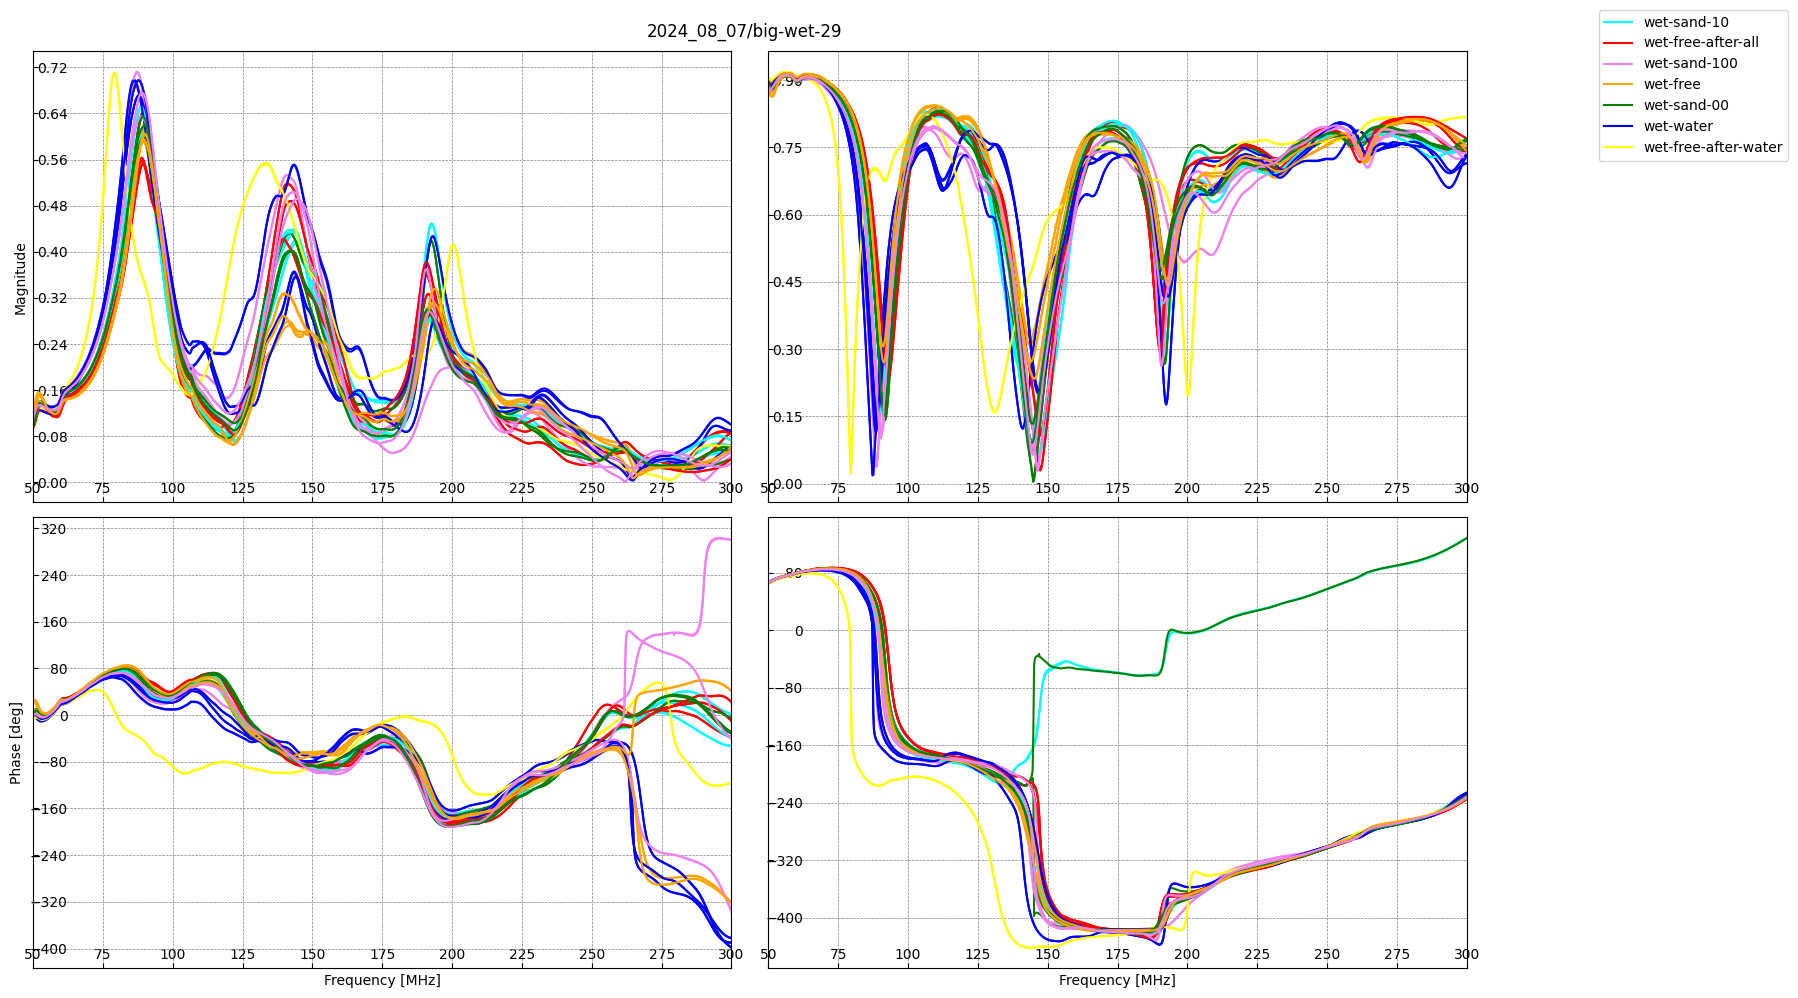

In [4]:
plot_dir('2024_08_07/big-wet-29')

2024_08_07/big-15 | ext-free-rot01-Ch1-Ch1.csv
2024_08_07/big-15 | ext-free-rot01-Ch1-Ch2.csv
2024_08_07/big-15 | ext-kacirek-water-03-Ch1.csv
2024_08_07/big-15 | ext-kacirek-water-02.PNG
2024_08_07/big-15 | ext-free-rot01.PNG
2024_08_07/big-15 | ext-free-rot01-Ch2.csv
2024_08_07/big-15 | ext-kacirek-free-03-Ch1.csv
2024_08_07/big-15 | ext-kacirek-free-03-Ch2.csv
2024_08_07/big-15 | ext-kacirek-free-02.PNG
2024_08_07/big-15 | ext-kacirek-water-03-Ch2.csv
2024_08_07/big-15 | ext-kacirek-water-03.PNG
2024_08_07/big-15 | ext-kacirek-water-02-Ch1.csv
2024_08_07/big-15 | ext-kacirek-water-01.PNG
2024_08_07/big-15 | ext-kacirek-free-02-Ch1.csv
2024_08_07/big-15 | ext-kacirek-free-03.PNG
2024_08_07/big-15 | ext-kacirek-free-01.PNG
2024_08_07/big-15 | ext-kacirek-water-02-Ch2.csv
2024_08_07/big-15 | ext-kacirek-water-01-Ch2.csv
2024_08_07/big-15 | ext-kacirek-free-02-Ch2.csv
2024_08_07/big-15 | ext-free-rot02.PNG
2024_08_07/big-15 | ext-free-rot01-Ch1.csv
2024_08_07/big-15 | ext-free-rot02-Ch2

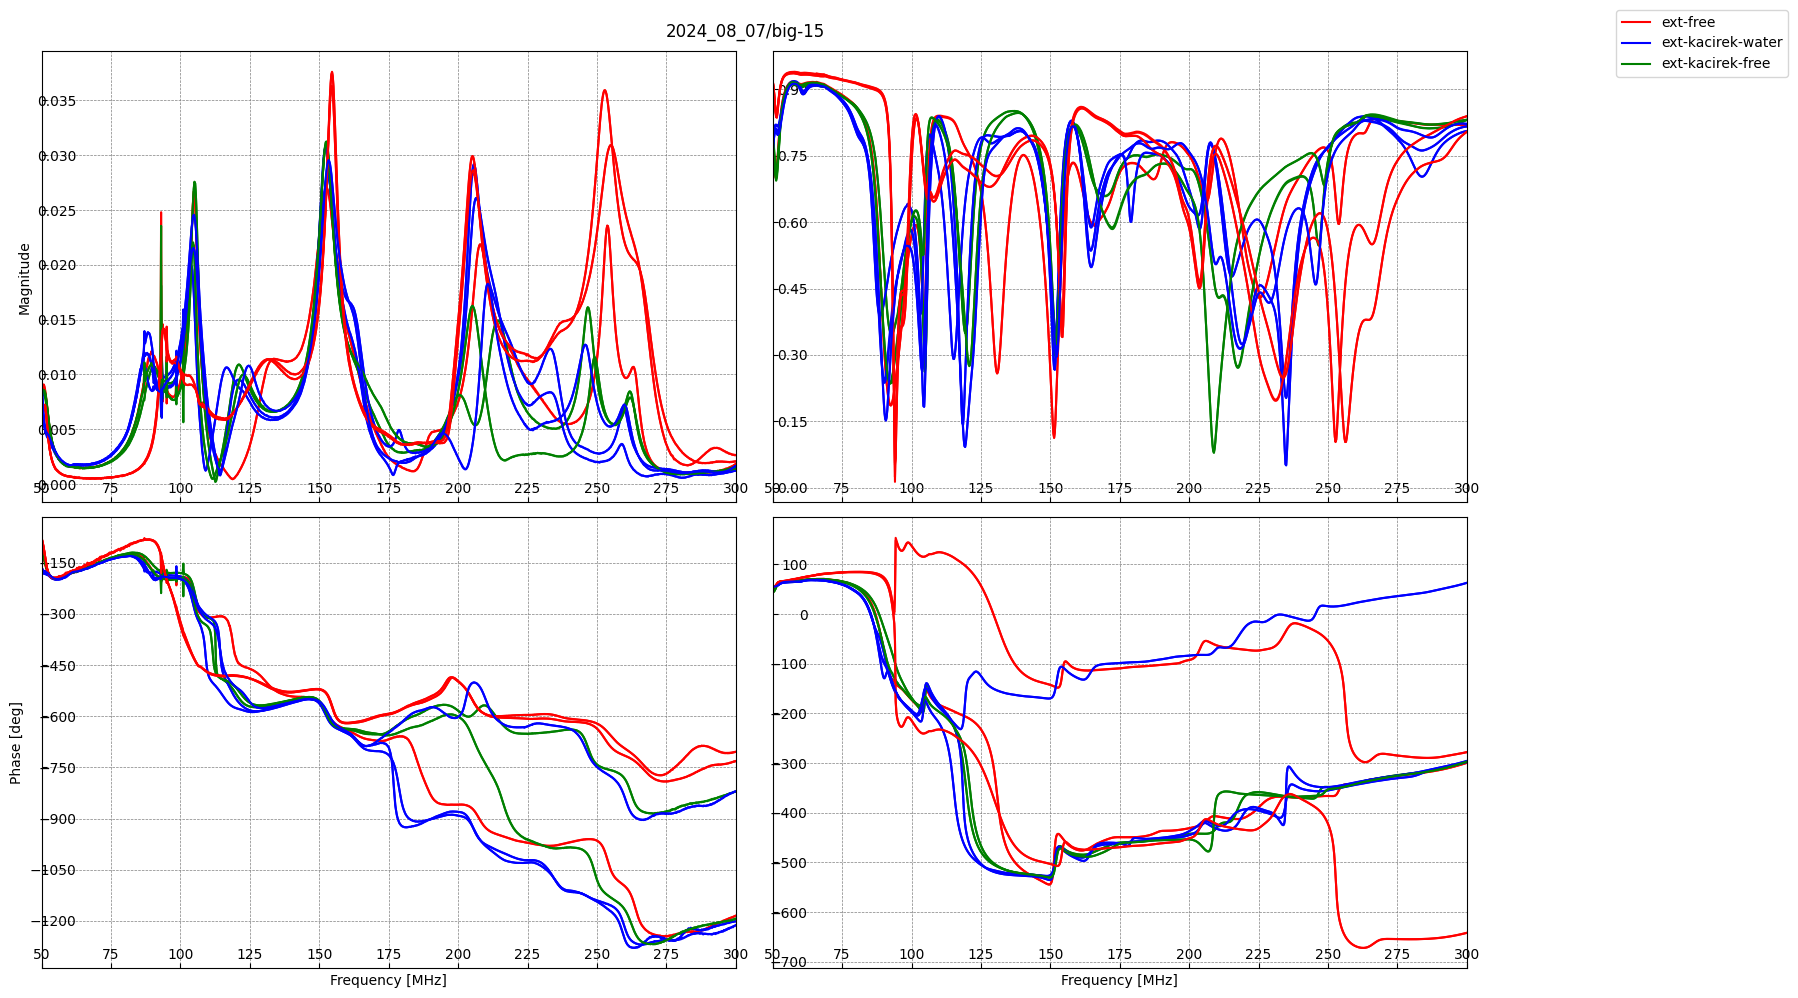

In [5]:
plot_dir('2024_08_07/big-15')

2024_08_07/big-wet-29 | wet-sand-10-03-Ch1.csv
2024_08_07/big-wet-29 | wet-free-after-all-01-Ch2.csv
2024_08_07/big-wet-29 | wet-sand-00-03.PNG
2024_08_07/big-wet-29 | wet-sand-100-03-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-10-01.PNG
2024_08_07/big-wet-29 | wet-sand-00-02.PNG
2024_08_07/big-wet-29 | wet-sand-10-01-Ch2.csv
2024_08_07/big-wet-29 | wet-free-after-all-01-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-10-02-Ch1.csv
2024_08_07/big-wet-29 | wet-water-01.PNG
2024_08_07/big-wet-29 | wet-sand-10-01-Ch1.csv
2024_08_07/big-wet-29 | wet-free-03.PNG
2024_08_07/big-wet-29 | wet-free-after-all-02.PNG
2024_08_07/big-wet-29 | wet-free-03-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-00-03-Ch2.csv
2024_08_07/big-wet-29 | wet-water-02-Ch2.csv
2024_08_07/big-wet-29 | wet-water-01-Ch2.csv
2024_08_07/big-wet-29 | wet-free-01.PNG
2024_08_07/big-wet-29 | wet-sand-100-02.PNG
2024_08_07/big-wet-29 | wet-sand-00-02-Ch1.csv
2024_08_07/big-wet-29 | wet-free-after-all-03.PNG
2024_08_07/big-wet-29 | wet-sand-0

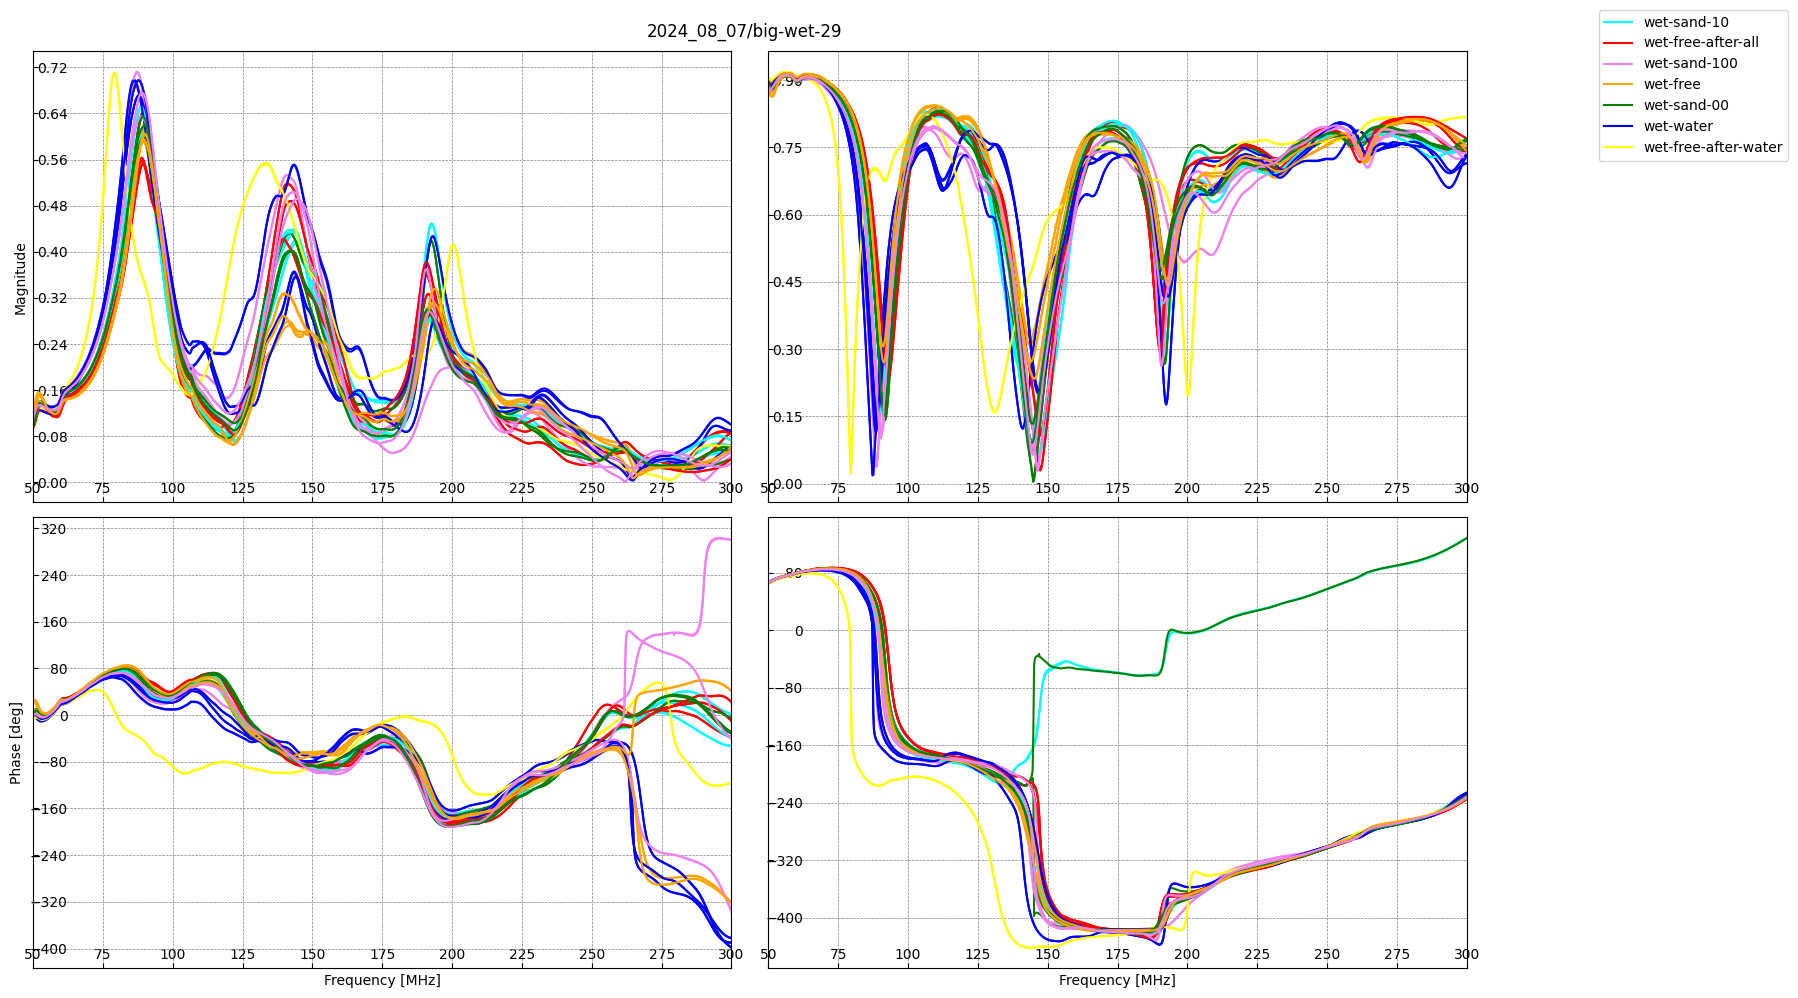

In [6]:
plot_dir('2024_08_07/big-wet-29')

2024_08_07/big-wet-29 | wet-sand-10-03-Ch1.csv
2024_08_07/big-wet-29 | wet-free-after-all-01-Ch2.csv
2024_08_07/big-wet-29 | wet-sand-00-03.PNG
2024_08_07/big-wet-29 | wet-sand-100-03-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-10-01.PNG
2024_08_07/big-wet-29 | wet-sand-00-02.PNG
2024_08_07/big-wet-29 | wet-sand-10-01-Ch2.csv
2024_08_07/big-wet-29 | wet-free-after-all-01-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-10-02-Ch1.csv
2024_08_07/big-wet-29 | wet-water-01.PNG
2024_08_07/big-wet-29 | wet-sand-10-01-Ch1.csv
2024_08_07/big-wet-29 | wet-free-03.PNG
2024_08_07/big-wet-29 | wet-free-after-all-02.PNG
2024_08_07/big-wet-29 | wet-free-03-Ch1.csv
2024_08_07/big-wet-29 | wet-sand-00-03-Ch2.csv
2024_08_07/big-wet-29 | wet-water-02-Ch2.csv
2024_08_07/big-wet-29 | wet-water-01-Ch2.csv
2024_08_07/big-wet-29 | wet-free-01.PNG
2024_08_07/big-wet-29 | wet-sand-100-02.PNG
2024_08_07/big-wet-29 | wet-sand-00-02-Ch1.csv
2024_08_07/big-wet-29 | wet-free-after-all-03.PNG
2024_08_07/big-wet-29 | wet-sand-0

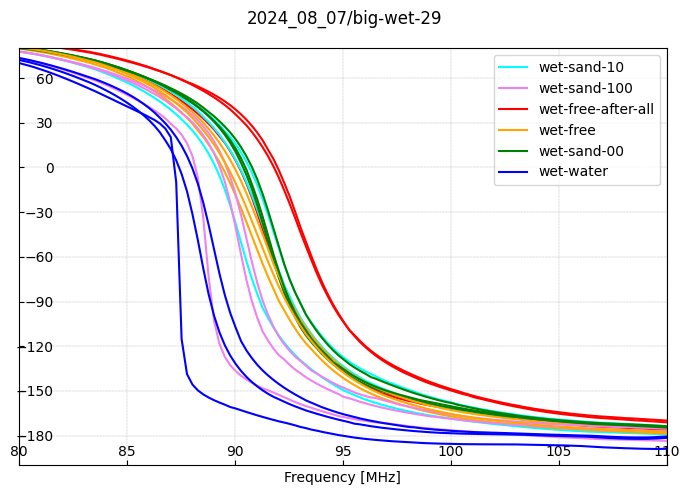

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
import re


default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def mag_phase(real, imaginary):
    magnitude = np.sqrt(real**2 + imaginary**2)
    phase = np.arctan2(imaginary, real) 
    cont_phase = np.unwrap(phase)
    # unwrap - add +/- 2pik where difference is  out of -/+ pi.
    deg = np.degrees(cont_phase)
    return magnitude, deg

def ax_setup(ax):
    ax.set_xticks(np.linspace(80, 110, 7))
    ax.grid(True, color='gray', linestyle='--', linewidth=0.2) 
    ax.set_xlim((80, 110))
    ax.set_ylim((-200, 80))
    ax.tick_params(axis='x', direction='in', pad=-15)
    ax.tick_params(axis='y', direction='in', pad=-25)

    #y_min, y_max = ax.get_ylim()

    # Calculate ideal number of ticks and find nice round numbers for limits
    # This is typically handled internally, but we'll do it manually for control
    from matplotlib.ticker import MaxNLocator
    
    # You can adjust 'nbins' to change the number of ticks
    nbins = 10  # Example: 5 ticks
    ax.yaxis.set_major_locator(MaxNLocator(nbins=nbins, integer=False))


file_col_map = {
    #'big-direct-free': 'orange',
    'wet-free': 'orange',
    'wet-free-after-water': '',
    'wet-free-after-all': 'red',
    #'ext-free': 'red',
    #'big-ext-kacirek-free': 'green',
    #'big-ext-free': 'red',
    #'ext-kacirek-free': 'green',
    #'ext-kacirek-water': 'blue',
    'wet-sand-00': 'green',
    'wet-sand-10': 'cyan',
    'wet-sand-100': 'violet',
    'wet-water': 'blue'
}

def plot_file_S11(axes, directory, filename):
    # Construct the full file path
    file_path = os.path.join(directory, filename)
    file_stem = None
    for key, i_col in file_col_map.items():
        if filename.startswith(key):
            file_stem = key 
            color = i_col
    if color == '':
        return
    if file_stem is None:
        print("No color for: ", filename)
    
    # Read the CSV file, ignoring comment lines
    df = pd.read_csv(file_path, sep=';', comment='#')
    
    freq = np.array(df['freq[Hz]']) / 1e6

    for i_re, i_im in [(1, 2), (3, 4)]:
        i_ax = None
        for i_s, s in enumerate(['S12', 'S11']):
            if df.columns[i_re].find(s) > -1:
                i_ax = i_s
        if i_ax == 0:
            continue
        mag, phase = mag_phase(df.iloc[:, i_re], df.iloc[:, i_im])
        #ax = axes[i_ax]
        #ax.plot(freq, mag, label=file_stem, color=color)
        #ax.set_xlabel('Frequency [Hz]')
        #if i_ax == 0:
        #    ax.set_ylabel('Magnitude')
        
        ax = axes[0]
        ax.plot(freq, phase, label=file_stem, color=color)
        ax.set_xlabel('Frequency [MHz]')
        if i_ax == 0:
            ax.set_ylabel('Phase [deg]')

def plot_S11(directory):
    
    # Create a figure with 4 subplots
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    axes = np.array([axes])
    
    #Process each CSV file in the directory
    for filename in os.listdir(directory):
        print(directory, '|', filename)
        if filename.endswith('Ch1.csv'):
            plot_file_S11(axes, directory, filename)
    #plot_file(axes, "big-ext-free-Ch1.csv")
    
    handles, labels = [], []
    for ax in axes.flatten():
        ax_setup(ax)
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:  # Check for duplicates
                handles.append(handle);
                labels.append(label)
            
    
    axes[0].legend(handles, labels, loc='upper right')
    fig.suptitle(directory)
    fig.tight_layout()
    fig.savefig(directory+'_detail.pdf')
    plt.show()

plot_S11('2024_08_07/big-wet-29')